https://www.zoopla.co.uk/to-rent/property/london/clapham/?identifier=london%2Fclapham&furnished_state=unfurnished&include_shared_accommodation=false&page_size=100&q=Clapham%2C%20London&search_source=refine&radius=1&price_frequency=per_month&pn=1

furnished_state = unfurnished/furnished
include_shared_accomodation = false/true
price_frequency = per_month /per_week
q - location. 
restults_sort = newest_listings
radius - 1 mile
page_size = number of results per page - 10,25,50,100

In [1]:
import urllib.request 
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
#To ignore FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Regex formula to find and separate the monthly cost in form of a number - 
#eliminate pound sign, comma and the weekly cost in parenthesis

reg = re.compile(r'£([0-9]{0,2}),?([0-9]{1,3}) \w+')
rent=[]
bedrooms=[]
bathrooms = []
receptions = []
link=[]
description=[]
location=[]
available=[]


for i in range(1,60):
    page_link='https://www.zoopla.co.uk/to-rent/property/battersea/?identifier=battersea&page_size=100&q=Battersea%2C%20London&search_source=refine&radius=1&price_frequency=per_month&pn={}'.format(i)
    page = urllib.request.urlopen(page_link)
    soup = BeautifulSoup(page, 'html.parser')
    print('Page '+str(i)+' done')
    
    try:
        listing = soup.find('ul', {'class': 'listing-results clearfix js-gtm-list'}).findAll('div', {'class':'listing-results-right clearfix'})
        for flat in listing:
            #Using regex to select monthly rent and appending it to rent list
            try:
                res = reg.search(flat.find('a', {'class':'listing-results-price text-price'}).text.strip())
                rent.append(int(res.group(1)+res.group(2)))
            except:
                rent.append(None)
            #Finding number of bedrooms in specific span and appending to list
            try:
                bedrooms.append(int(flat.find('span', {'class':'num-icon num-beds'}).text.strip()))
            except:
                bedrooms.append(None)
            #Finding number of bathroom in span and appending to list
            try:
                bathrooms.append(int(flat.find('span', {'class':'num-icon num-baths'}).text.strip()))
            except:
                bathrooms.append(None)
            #Finding number of reception rooms and appending to list:
            try:
                receptions.append(int(flat.find('span', {'class':'num-icon num-reception'}).text.strip()))
            except:
                receptions.append(None)
            #Finding link and flat description:
            link.append('https://www.zoopla.co.uk'+flat.find('h2').find('a')['href'])
        
            description.append(flat.find('h2').find('a').text.strip())
        
            #Location:
            try:
                location.append(flat.findAll('span', {'class': None})[-1].text.strip())
            except:
                location.append(None)
            #Available:
            try:
                available.append(flat.find('p', {'class':'available-from'}).text.strip())
            except:
                available.append(None)
        time.sleep(1)
    except:
        break

Page 1 done
Page 2 done
Page 3 done
Page 4 done
Page 5 done
Page 6 done
Page 7 done
Page 8 done
Page 9 done
Page 10 done
Page 11 done
Page 12 done
Page 13 done
Page 14 done
Page 15 done
Page 16 done
Page 17 done
Page 18 done
Page 19 done
Page 20 done
Page 21 done
Page 22 done
Page 23 done
Page 24 done
Page 25 done
Page 26 done
Page 27 done
Page 28 done
Page 29 done
Page 30 done
Page 31 done
Page 32 done
Page 33 done
Page 34 done
Page 35 done
Page 36 done
Page 37 done
Page 38 done
Page 39 done
Page 40 done
Page 41 done
Page 42 done
Page 43 done
Page 44 done
Page 45 done
Page 46 done
Page 47 done
Page 48 done
Page 49 done
Page 50 done
Page 51 done
Page 52 done
Page 53 done
Page 54 done
Page 55 done
Page 56 done
Page 57 done
Page 58 done
Page 59 done


In [138]:
df = pd.DataFrame({'Rent':rent,
                  'Bedrooms': bedrooms,
                  'Bathrooms': bathrooms,
                  'Receptions': receptions,
                  'Description': description,
                  'Location': location,
                  'Available': available,
                  'Link': link})

In [139]:
df.to_csv('battersea.csv', index=False)

In [140]:
df = pd.read_csv('battersea.csv')

In [141]:
df.head()

,Rent,Bedrooms,Bathrooms,Receptions,Description,Location,Available,Link
0,2709.0,2.0,1.0,1.0,2 bed flat to rent,"Rosary Gardens, Kensington SW7",NaN,https://www.zoopla.co.uk/to-rent/details/50407892
1,1816.0,NaN,1.0,1.0,Studio to rent,"2 Exchange Gardens, London SW8",Available immediately,https://www.zoopla.co.uk/to-rent/details/50407875
2,9533.0,3.0,3.0,1.0,3 bed maisonette to rent,"Cranley Gardens, London SW7",Available from 12th Feb 2019,https://www.zoopla.co.uk/to-rent/details/50407811
3,2058.0,2.0,1.0,1.0,2 bed flat to rent,"Old Brompton Road, London SW5",Available from 24th Feb 2019,https://www.zoopla.co.uk/to-rent/details/50407741
4,3640.0,2.0,2.0,1.0,2 bed flat to rent,"Haydn Tower, Nine Elms Point, London SW8",Available immediately,https://www.zoopla.co.uk/to-rent/details/50407736


In [142]:
df.describe()

,Rent,Bedrooms,Bathrooms,Receptions
count,5858.000000,5496.000000,4782.000000,4176.000000
mean,4485.623080,2.172489,1.679841,1.137692
std,7295.157216,1.254835,0.917974,0.448504
min,87.000000,1.000000,1.000000,1.000000
25%,1993.000000,1.000000,1.000000,1.000000
50%,2817.000000,2.000000,1.000000,1.000000
75%,4000.000000,3.000000,2.000000,1.000000
max,86667.000000,34.000000,9.000000,7.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 8 columns):
Rent           5858 non-null float64
Bedrooms       5496 non-null float64
Bathrooms      4782 non-null float64
Receptions     4176 non-null float64
Description    5859 non-null object
Location       5859 non-null object
Available      3994 non-null object
Link           5859 non-null object
dtypes: float64(4), object(4)
memory usage: 366.3+ KB


In [144]:
#Dropping rows where Rent if a missing value:
df = df[df['Rent'].notnull()]

If the flat is a studio - rather than have missing value in the Bedrooms column it should have 0

In [150]:
for index,row in df.iterrows():
    if 'studio' in row['Description'].lower():
        df.set_value(index, ['Bedrooms'], 0)

/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
#Removing entries where 2 or more values in Bedrooms, Bathrooms, Receptions columns are missing.
df = df.dropna(thresh=2, subset=['Bedrooms', 'Bathrooms', 'Receptions'])

In [153]:
df.Bedrooms.value_counts()

2.0     2208
1.0     1186
3.0      684
0.0      269
4.0      265
5.0      100
7.0       47
6.0       32
8.0        5
34.0       1
28.0       1
15.0       1
9.0        1
Name: Bedrooms, dtype: int64

In [154]:
#Removing flats where number of bedrooms is higher than 5
df = df[df['Bedrooms']<=5]

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 5858
Data columns (total 8 columns):
Rent           4712 non-null float64
Bedrooms       4712 non-null float64
Bathrooms      4692 non-null float64
Receptions     4095 non-null float64
Description    4712 non-null object
Location       4712 non-null object
Available      3183 non-null object
Link           4712 non-null object
dtypes: float64(4), object(4)
memory usage: 331.3+ KB


In [156]:
df.Bathrooms.value_counts()

1.0    2406
2.0    1827
3.0     367
4.0      71
5.0      19
6.0       2
Name: Bathrooms, dtype: int64

In [157]:
#Removing flats where number of bathrooms is higher than 4:
df=df[df['Bathrooms']<=4]

In [158]:
#Looking at receptions count but the values seem fine
df.Receptions.value_counts()

1.0    3686
2.0     333
3.0      30
4.0       6
Name: Receptions, dtype: int64

In [194]:
df.Description.value_counts()

flat        3565
house        278
terraced     102
Name: Description, dtype: int64

Looking at descriptions - most popular types are 'flat', 'house' and 'terraced house'. To make the analysis easier: anything that has a flat (or studio) in it will be assigned to 'flat', anything else will be assigned to 'house' or 'terraced house' if it has 'terrace' in the name. 
Entries that are room/flat shared need to be removed

In [132]:
for index,row in df.iterrows():
    if 'room' in row['Description'].lower() or 'shared' in row['Description'].lower():
        df.drop(index, inplace=True)

In [133]:
for index,row in df.iterrows():
    if 'studio' in row['Description'].lower():
        df.set_value[index, 'Bedrooms'] = 0

In [134]:
df.Bedrooms.value_counts()

2.0    2196
1.0    1152
3.0     679
4.0     262
5.0      81
Name: Bedrooms, dtype: int64

In [160]:
#Replacing every flat description with 'flat', house that has a terrace with 'terraced' and any other value with 'house'
for index,row in df.iterrows():
    if 'flat' in row['Description'].lower() or 'studio' in row['Description'].lower():
        df.set_value(index, 'Description', 'flat')
    elif 'terraced' in row['Description'].lower():
        df.set_value(index, 'Description', 'terraced')
    else:
        df.set_value(index, 'Description', 'house')

/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [161]:
df.Description.value_counts()

flat        4038
house        462
terraced     171
Name: Description, dtype: int64

In [162]:
#Resetting index
df.reset_index(drop=True, inplace=True)

In [165]:
df.isna().sum()

Rent              0
Bedrooms          0
Bathrooms         0
Receptions      616
Description       0
Location          0
Available      1512
Link              0
dtype: int64

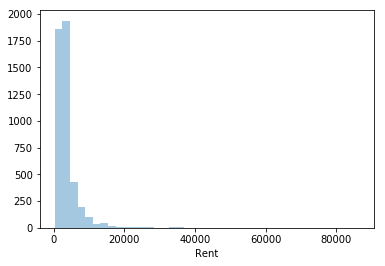

In [166]:
sns.distplot(df['Rent'], kde=False, bins=40)

In [167]:
df.Rent.describe()

count     4671.000000
mean      3790.398630
std       4199.340882
min        299.000000
25%       2000.000000
50%       2817.000000
75%       3900.000000
max      86450.000000
Name: Rent, dtype: float64

Max of over 20 000 a month looks like an outlier - it's worth getting rid of. To make data easier to work with let's set upper limit to £5000.

In [168]:
df=df[df['Rent']<5000]

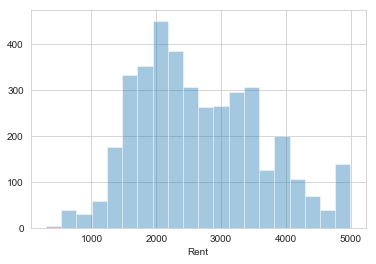

In [175]:
sns.set_style('whitegrid')
sns.distplot(df['Rent'], kde=False, bins=20)

Looks like a normal distribution with most flats falling between £1500-3000

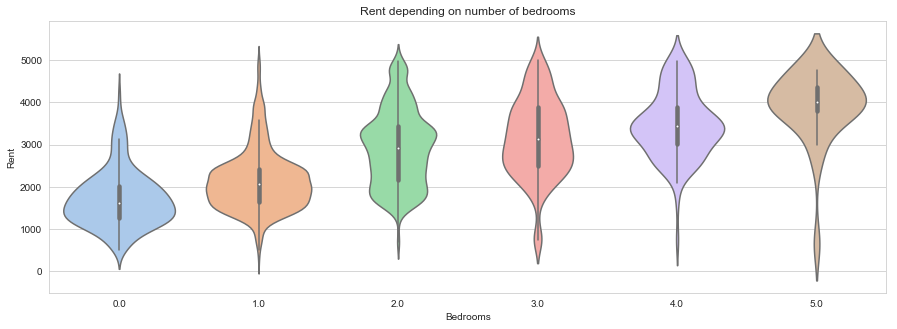

In [188]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Bedrooms', y='Rent', data=df, palette='pastel')
plt.title('Rent depending on number of bedrooms');

Text(0.5, 1.0, 'Rent depending on type of accomodation')

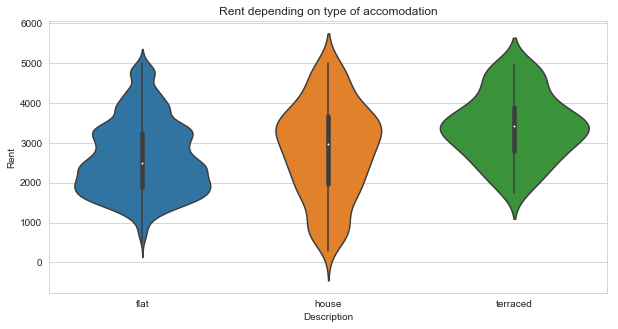

In [193]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Description', y='Rent', data=df)
plt.title('Rent depending on type of accomodation')

### Let's now analyse flats that are available immediately and flats that you need to wait for:

In [242]:
#Creating new dataframes filtering on availability
available_now = df[df['Available']=='Available immediately']
available_later = df[df['Available']!='Available immediately']

In [241]:
print('available_now: ' +str(available_now.shape[0]))
print('available later: '+str(available_later.shape[0]))

available_now: 1776
available later: 2169


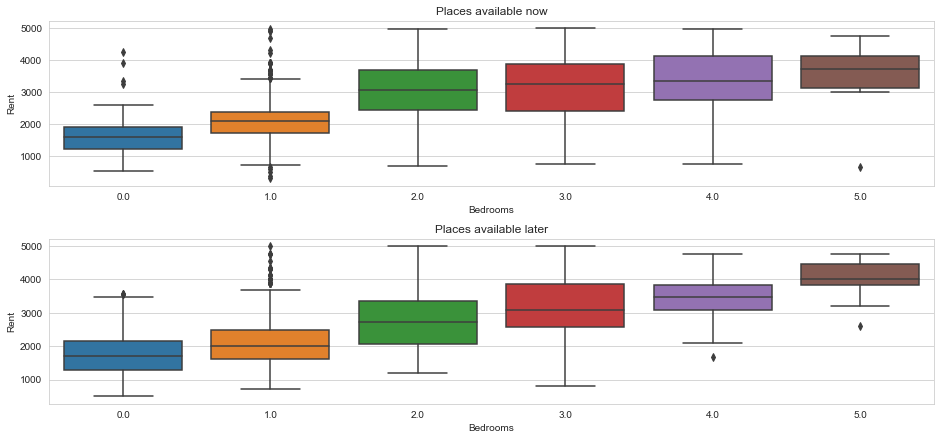

In [252]:
#Creating boxplots for flats available now and later
fig, ax =plt.subplots(2,1,figsize=(13,6),constrained_layout=True)
sns.boxplot(x='Bedrooms', y='Rent', data=available_now, ax=ax[0])
sns.boxplot(x='Bedrooms', y='Rent', data=available_later, ax=ax[1])
ax[0].set_title('Places available now')
ax[1].set_title('Places available later')
plt.show()

In [253]:
df.isna().sum()

Rent              0
Bedrooms          0
Bathrooms         0
Receptions      573
Description       0
Location          0
Available      1258
Link              0
dtype: int64

### Lots of information about availability is missing. Same for receptions:

In [254]:
df[df.Receptions.isna()]

,Rent,Bedrooms,Bathrooms,Receptions,Description,Location,Available,Link
7,2275.0,2.0,1.0,NaN,house,"Birley Street, London SW11",Available immediately,https://www.zoopla.co.uk/to-rent/details/46845981
10,1733.0,2.0,1.0,NaN,flat,"Mayflower Road, London SW9",Available from 16th Feb 2019,https://www.zoopla.co.uk/to-rent/details/49447854
25,1500.0,1.0,2.0,NaN,flat,"Trinity Road, London SW17",Available from 17th Mar 2019,https://www.zoopla.co.uk/to-rent/details/50404351
29,3250.0,3.0,1.0,NaN,house,"Elmfield Road, London SW17",Available from 2nd Mar 2019,https://www.zoopla.co.uk/to-rent/details/50403459
39,1600.0,2.0,1.0,NaN,flat,"Earsfield Road, London SW18",Available immediately,https://www.zoopla.co.uk/to-rent/details/50402756
40,1650.0,2.0,2.0,NaN,flat,"Brixton Road, London SW9",Available from 5th Apr 2019,https://www.zoopla.co.uk/to-rent/details/50402624
41,1500.0,1.0,1.0,NaN,flat,"Eckstein Road, London SW11",Available from 16th Feb 2019,https://www.zoopla.co.uk/to-rent/details/50402634
42,1755.0,2.0,1.0,NaN,flat,"Clapham South, London SW12",Available immediately,https://www.zoopla.co.uk/to-rent/details/50402604
43,1600.0,2.0,1.0,NaN,flat,"Brixton Road, London SW9",Available from 5th Apr 2019,https://www.zoopla.co.uk/to-rent/details/50402587
61,2384.0,2.0,1.0,NaN,flat,"Vauxhall Bridge Road, Westminster SW1V",NaN,https://www.zoopla.co.uk/to-rent/details/50401734


In [255]:
df.groupby(['Bedrooms', 'Bathrooms'])['Rent'].mean()

Bedrooms  Bathrooms
0.0       1.0          1718.783270
1.0       1.0          2153.564831
          2.0          2001.285714
          3.0          1187.500000
2.0       1.0          2561.041975
          2.0          3179.940185
          3.0          2898.000000
3.0       1.0          2457.874016
          2.0          3439.050691
          3.0          3774.951220
4.0       1.0          2522.125000
          2.0          3417.115942
          3.0          4156.416667
          4.0          4037.333333
5.0       1.0           650.000000
          2.0          4073.705882
          3.0          3994.600000
Name: Rent, dtype: float64

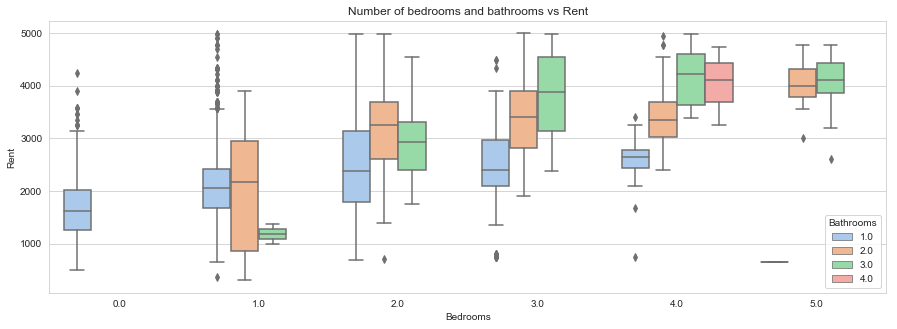

In [265]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Bedrooms', y='Rent', hue='Bathrooms', data=df, palette='pastel')
plt.title('Number of bedrooms and bathrooms vs Rent');

### Higher number of bathrooms doesn't always mean higher rent - places with 2 bedrooms and 3 bathrooms are, on average, cheaper than places with 2 bathrooms.

### How number of receptions influences the rent price

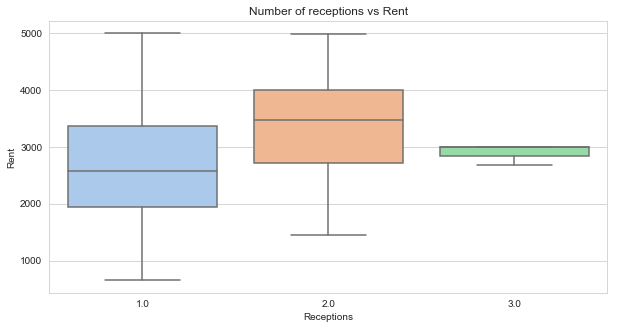

In [264]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Receptions', y='Rent',data=df, palette='pastel')
plt.title('Number of receptions vs Rent');

## Best way would be to fill the missing values with means for specific number of bedrooms - can't figure out how.

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
lr = LinearRegression()

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
df.columns

Index(['Rent', 'Bedrooms', 'Bathrooms', 'Receptions', 'Description',
       'Location', 'Available', 'Link'],
      dtype='object')

In [271]:
X = df[['Bedrooms', 'Bathrooms']]
y=df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [272]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
predict = lr.predict(X_test)

In [274]:
from sklearn.metrics import classification_report

In [275]:
lr.coef_

array([296.87412408, 648.8499204 ])

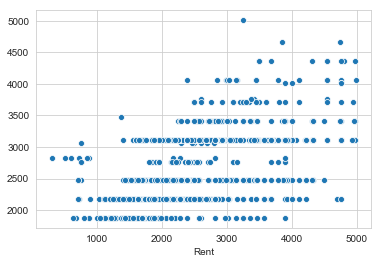

In [276]:
sns.scatterplot(y_test, predict)

In [277]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict)

614.6155736010444

In [278]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)

595976.6333091635

In [279]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, predict))

771.9952288124348

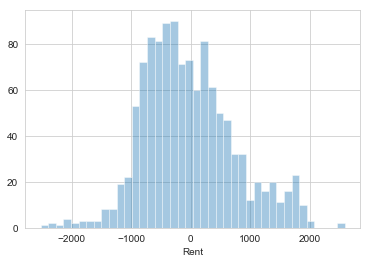

In [280]:
sns.distplot(y_test - predict, bins=40, kde=False)

In [281]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Bedrooms,296.874124
Bathrooms,648.849920


## To do: 
- check other areas, compare them
